# Explore the dataset

In [843]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ase
import ase.io
import ase.visualize

In [844]:
# make project package importable, hardcoded to current folder level of this specific notebook. 
# Add more `.parent` or remove when called from a different level.
import sys
project_path = str(Path.cwd().parent.parent)
if project_path not in sys.path:
    sys.path.append(project_path)

In [845]:
#pip install -e .

In [846]:
import sisclab22p6.data
filepath_data = "../../data/jij"
filename_table = "d_block_magnetic_data_modified.csv"
filename_structures = "dimer_clusters.extxyz"
table = sisclab22p6.data.load_jij_data(filepath = filepath_data, 
                                       filename_table=filename_table, 
                                       filename_structures=filename_structures)

table.head()

Loaded Number samples: 1730, 1730.


workchain_label  imp0  imp1  ilayer0  ilayer1  offset0  offset1  \
0  Sc:Ti:Bi2Te3_il_3_3_Off_1    21    22        3        3        0        1   
1   Sc:Y:Bi2Te3_il_3_3_Off_1    21    39        3        3        0        1   
2  Sc:Sc:Bi2Te3_il_3_3_Off_1    21    21        3        3        0        1   
3  Mn:Sc:Bi2Te3_il_3_3_Off_1    25    21        3        3        0        1   
4  Cr:Sc:Bi2Te3_il_3_3_Off_1    24    21        3        3        0        1   

                                           structure             J  \
0  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...  1.242709e-02   
1  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i... -2.337413e-21   
2  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i... -5.764835e-21   
3  (Atom('Mn', [0.0, 0.0, 0.0], mass=54.938045, i...  8.237921e-02   
4  (Atom('Cr', [0.0, 0.0, 0.0], mass=51.9961, ind...  3.978618e-02   

              D  ...  KKR_rcut1  KKR_rcut_unit        rx   ry   rz         r  \
0  2.952999e-03  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   
1  3.586830e-22  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   
2  1.383125e-21  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   
3  8.294382e-03  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   
4  2.661418e-02  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   

           mom1          mom2       tot_mom  \
0  1.856702e-06  8.152756e-01  8.152775e-01   
1 -4.173850e-11 -3.308398e-11 -7.482248e-11   
2 -4.285949e-11 -4.675482e-11 -8.961432e-11   
3  4.409489e+00  1.069743e-02  4.420186e+00   
4  3.815394e+00  4.514470e-03  3.819909e+00   

                               jij_uuid  
0  9ec53578-777c-4884-a3a7-084ad3586748  
1  b218302c-a882-46f3-b4d7-e148d9f1cb0b  
2  19f51d50-b554-4eb1-b106-a9e78a1831f4  
3  93cdd1c9-1cb4-4674-aefd-f427f7d23ef8  
4  de909ef1-e7c6-4566-b585-1c0d3f072f40  

[5 rows x 24 columns]

In [847]:
table.to_csv('out.png')

In [848]:
structure = table.iloc[:,7]
structure

0       (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...
1       (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...
2       (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...
3       (Atom('Mn', [0.0, 0.0, 0.0], mass=54.938045, i...
4       (Atom('Cr', [0.0, 0.0, 0.0], mass=51.9961, ind...
                              ...                        
1725    (Atom('Cr', [0.0, 0.0, 0.0], mass=51.9961, ind...
1726    (Atom('Mn', [0.0, 0.0, 0.0], mass=54.938045, i...
1727    (Atom('Mo', [0.0, 0.0, 0.0], mass=95.96, index...
1728    (Atom('Nb', [0.0, 0.0, 0.0], mass=92.90638, in...
1729    (Atom('Nb', [0.0, 0.0, 0.0], mass=92.90638, in...
Name: structure, Length: 1730, dtype: object

## Visualize two impurities per  structure

In [849]:
# visualize two impurities per  structure
from ase.io import write

structure3 = structures[3]
ase.visualize.view(structure3, viewer='x3d')
write('test5.png', structure3)

## Visualize X-coordinate feature space atrix

In [850]:
def get_coordinate_feature_matrix(structures) -> np.ndarray:
    num_samples = len(structures)
    num_atoms_max = max(s.get_global_number_of_atoms() for s in structures)
    num_features = 1*num_atoms_max + 3*num_atoms_max

    X_coordinates = np.zeros((num_samples, num_features))
    
    for i_sample, structure in enumerate(structures):
        structure.center()
        # create coordinate feature space matrix
        # features = atomic numbers plus xyz coordinates of each atom
        # pad each section with zeroes so that feature vectors for molecules with different number of atoms have same length
        num_atoms = structure.get_global_number_of_atoms()
        atomic_numbers = structure.numbers
        positions_flattened = structure.positions.flatten()    

        # make scale atomic numbers to same 'size' as coordinates in feature space
        norm1 = np.linalg.norm(atomic_numbers, ord=0)
        norm2 = np.linalg.norm(positions_flattened, ord=0)
        atomic_numbers = atomic_numbers * (norm2 / norm1)  

        # concatenate into feature vector
        feature_vector = np.zeros((num_features,))
        feature_vector[:num_atoms] = atomic_numbers
        feature_vector[num_atoms_max : num_atoms_max + 3*num_atoms] = positions_flattened    

        # add to feature matrix
        X_coordinates[i_sample,:] = feature_vector
        
    return X_coordinates

In [851]:
X_coordinates = get_coordinate_feature_matrix(structures)

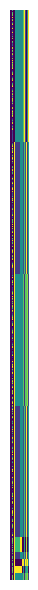

In [852]:
import sisclab22p6.features
import sisclab22p6.features_plotters

sisclab22p6.features_plotters.plot_feature_matrix(X_coordinates, transpose=False)#, filepath='fig/X_coordinates.pdf')
plt.savefig('fig/X_coordinates.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

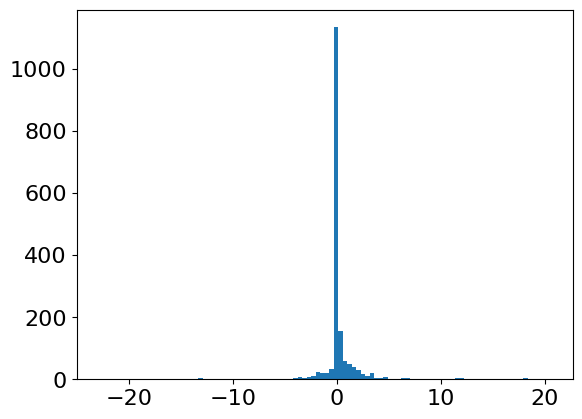

In [853]:
#Show the distribution of target value Jij
J = table.iloc[:,8]

plt.hist(np.array(table['J']), bins = 100)
plt.show()

In [854]:
#Count the number of chemical species present in the input structures
structures =  list(table.structure)
global_species = sisclab22p6.features.get_chemical_species(structures)
len(global_species)

21

In [855]:
#The maximum number of atoms in one sample (dimer impurity embedding)
len(atoms)

14

# Create a benchmark to learn the Jij interaction (column J) from the dataset. 
As descriptors, use Coulomb Matrix and SOAP. As models, use KRR and GPR. Compare the implementations in DScribe, scikit-learn and librascal implementations. 

## Coulomb Matrix

In [856]:
from dscribe.descriptors import CoulombMatrix

# Setting up the CM descriptor
cm = CoulombMatrix(
    n_atoms_max=len(atoms), #14
    permutation='sorted_l2'
)

In [857]:
#from ase.io import read

sample = []
for i in range (len(structure)):
    atoms = structure[i]
    #print(atoms.symbols)
    sample.append(atoms)   

coulomb_matrices = cm.create(sample, n_jobs=2)  # Parallel
#print(coulomb_matrices)
#print("flattened", coulomb_matrices.shape)

In [858]:
# set CoulombMatrix as features
x = coulomb_matrices

# set J as target labels
y = table.iloc[:,8]

In [859]:
import math, random

rand_mol = random.randint(0, len(y))
#print(x[rand_mol])

<Figure size 640x480 with 0 Axes>

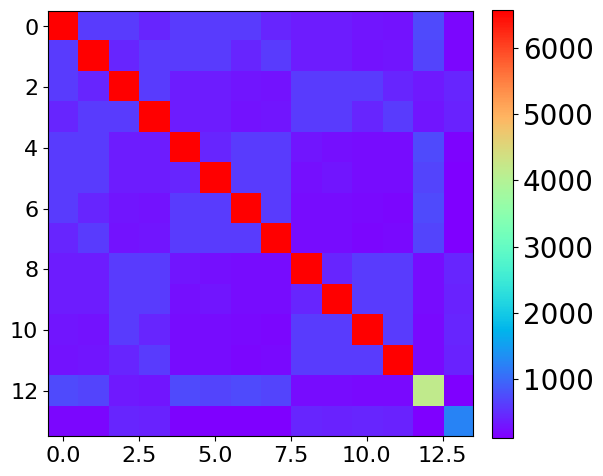

In [860]:
# Visualize the Coulomb matrix of the random molecule.

import matplotlib.pyplot as plt

shape = (len(atoms), len(atoms))
mat = x[rand_mol].reshape(shape)

plt.figure()
plt.figure(figsize = (6,6))
plt.imshow(mat, origin="upper", cmap='rainbow')#, vmin=-15, vmax=90, interpolation='nearest')
plt.colorbar(fraction=0.046, pad=0.04).ax.tick_params(labelsize=20)
plt.axis('on')
#plt.show()

plt.savefig('fig/coulomb_matrices_small.png', dpi=100, bbox_inches="tight")

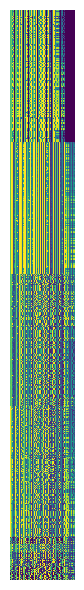

In [861]:
# Visualize Coulomb matrix feature matrix
import sisclab22p6.features
import sisclab22p6.features_plotters

sisclab22p6.features_plotters.plot_feature_matrix(coulomb_matrices, transpose=False)#, filepath='fig/X_coulomb.pdf')
plt.savefig('fig/coulomb_matrices.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

In [862]:
## shuffle the data
import random

c = list(zip(x, y))
random.shuffle(c)

x, y = zip(*c)

x = np.array(x)
y = np.array(y)

### Linear KRR and set test size = 0.25

In [863]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

alpha = np.logspace(-4, -2, 3)
gamma = np.logspace(-4, -2, 3)

cv_number = 3
kernel = 'linear'
scoring_function = 'neg_mean_absolute_error'
grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                           cv = cv_number, 
                           scoring = scoring_function,
                           verbose=3) 
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=linear;, score=-1.546 total time=   0.2s


/opt/aiida-kernel/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=4.06177e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/aiida-kernel/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=2.85899e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/aiida-kernel/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=2.21622e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=linear;, score=-2.229 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=linear;, score=-1.648 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=linear;, score=-1.546 total time=   0.1s


/opt/aiida-kernel/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=4.06177e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/aiida-kernel/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=2.85899e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=linear;, score=-2.229 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=linear;, score=-1.648 total time=   0.2s


/opt/aiida-kernel/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=2.21622e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/aiida-kernel/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=4.06177e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/aiida-kernel/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=2.85899e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=linear;, score=-1.546 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=linear;, score=-2.229 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=linear;, score=-1.648 total time=   0.1s


/opt/aiida-kernel/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=2.21622e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=linear;, score=-1.399 total time=   0.1s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=linear;, score=-2.164 total time=   0.1s
[CV 3/3] END alpha=0.001, gamma=0.0001, kernel=linear;, score=-1.598 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.001, kernel=linear;, score=-1.399 total time=   0.1s
[CV 2/3] END alpha=0.001, gamma=0.001, kernel=linear;, score=-2.164 total time=   0.1s
[CV 3/3] END alpha=0.001, gamma=0.001, kernel=linear;, score=-1.598 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.01, kernel=linear;, score=-1.399 total time=   0.1s
[CV 2/3] END alpha=0.001, gamma=0.01, kernel=linear;, score=-2.164 total time=   0.1s
[CV 3/3] END alpha=0.001, gamma=0.01, kernel=linear;, score=-1.598 total time=   0.1s
[CV 1/3] END alpha=0.01, gamma=0.0001, kernel=linear;, score=-1.401 total time=   0.1s
[CV 2/3] END alpha=0.01, gamma=0.0001, kernel=linear;, score=-2.162 total time=   0.1s
[CV 3/3] END alpha=0.01, gamma=0.0001, kern

In [866]:
# predicted Jij for all test molecules

#y_pred1 = grid_search.predict(x_test)
y_pred1 = grid_search.predict(x_test)

print("Mean absolute error on test set: %0.3f meV" %(np.abs(y_pred1-y_test)).mean())
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred1))

Mean absolute error on test set: 1.342 meV
R^2 score on test set: -0.400


### KKR and set test size = 0.1

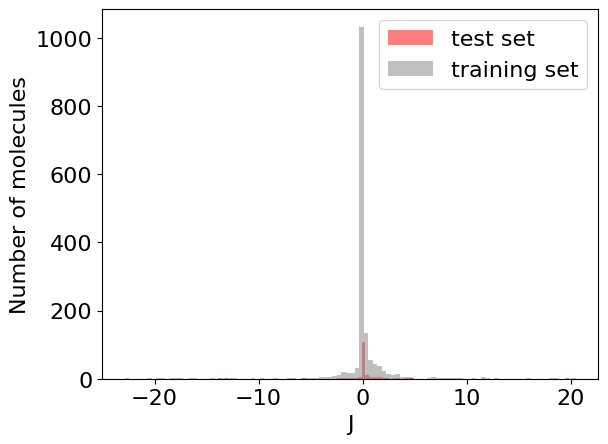

In [767]:
#Visualize the distribution of the target value Jij in training set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
plt.xlabel("J")
plt.ylabel("Number of molecules")
plt.legend()
plt.show()

In [768]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

alpha = np.logspace(-4, -2, 3)
gamma = np.logspace(-4, -2, 3)

cv_number = 3 ## choose into how many parts training set is divided for cross-validation
kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

## define settings for grid search routine in scikit-learn with above defined grids as input

grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                           cv = cv_number, 
                           scoring = scoring_function,
                           verbose=3)  ## produces detailed output statements of grid search 
                                          # routine so we can see what is computed
    
# call the fit function in scikit-learn which fits the Coulomb matrices in the training set 
# to their corresponding Jij.
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.360 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.335 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.462 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.449 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.415 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.529 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.449 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.415 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.529 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.360 total time=   0.2s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.335 total time=   0.2s
[CV 3

GridSearchCV(cv=3, estimator=KernelRidge(),
             param_grid=[{'alpha': array([0.0001, 0.001 , 0.01  ]),
                          'gamma': array([0.0001, 0.001 , 0.01  ]),
                          'kernel': ['rbf']}],
             scoring='neg_mean_absolute_error', verbose=3)

Mean absolute error on test set: 0.246 eV


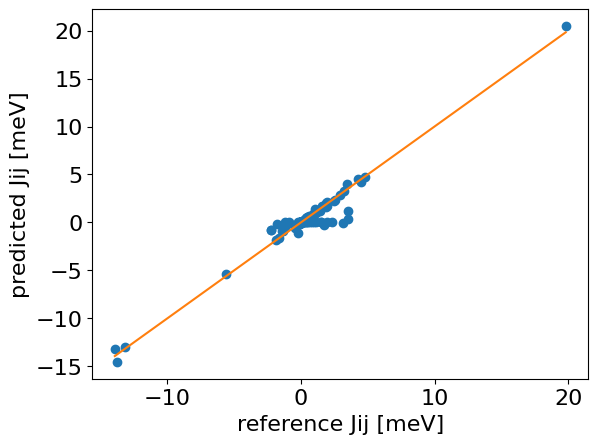

R^2 score on test set: 0.947


In [769]:
# predicted Jij for all test molecules

y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                     # of hyperparameters from grid search

print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

# do the regression plot
plt.plot(y_test, y_pred, 'o')
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
plt.xlabel('reference Jij [meV]')
plt.ylabel('predicted Jij [meV]')
plt.show()
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred))

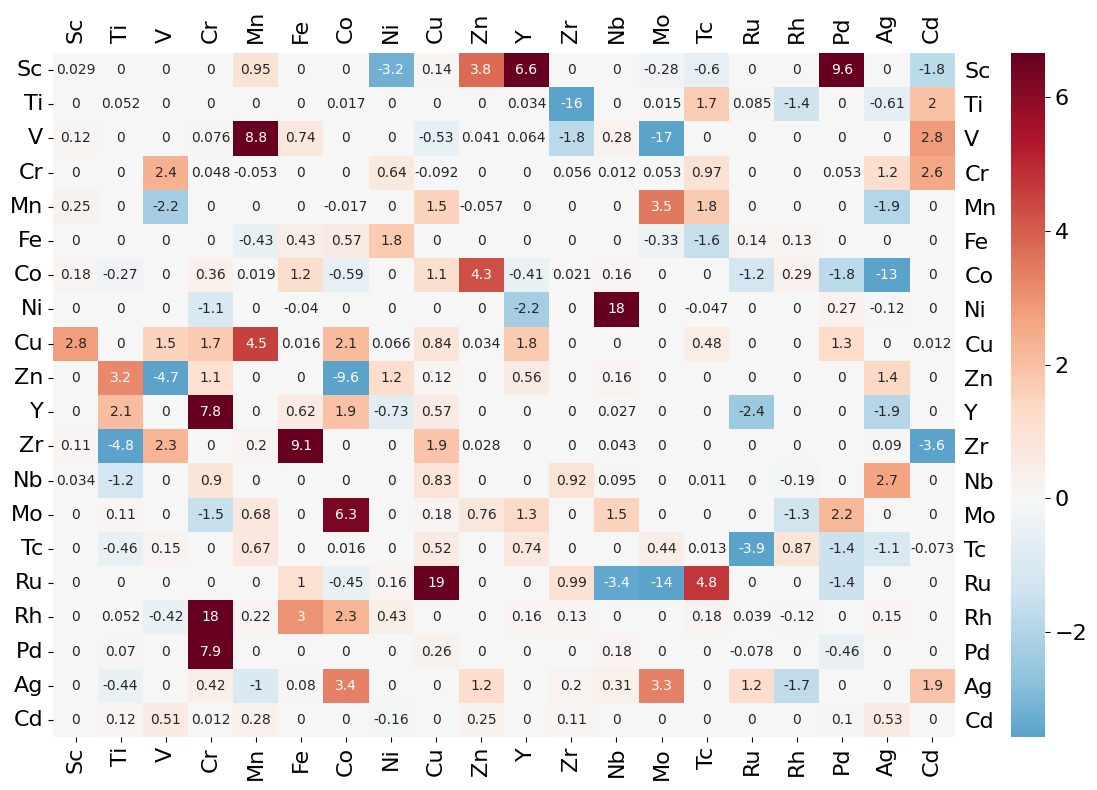

In [546]:
# plot Jij "parity heatmap", from prediction on ALL data 
#(if only heatmapping abs. err. of y_train or y_test, need additional args for rematching to input structures; how-to see examples in function docstring)

y_pred = grid_search.predict(x) # make prediction on FULL feature matrix!
y_abs_err = np.abs(y - y_pred)
heatmap_matrix_parity, missing_defect_pairs = \
  sisclab22p6.target_plotters.create_heatmap_matrix(table, value_array=y, ilayer1= 3,
                          offset1=1, aggregate_function='mean')

# plot heatmap and save
sisclab22p6.target_plotters.plot_heatmap(heatmap_matrix_parity, publication_target='slides', fontsize='small')
plt.savefig('fig/parity-heatmap-Jij.pdf')

### KKR and set test size = 0.25

In [819]:
## shuffle the data
import random

c = list(zip(x, y))
random.shuffle(c)

x, y = zip(*c)

x = np.array(x)
y = np.array(y)

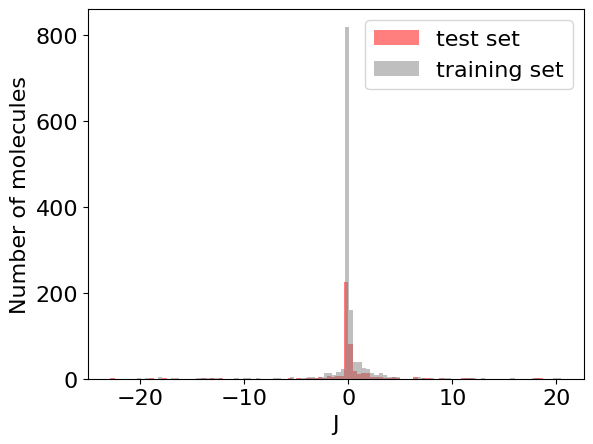

In [820]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
plt.xlabel("J")
plt.ylabel("Number of molecules")
plt.legend()
plt.show()

In [821]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

alpha = np.logspace(-4, -2, 3)
gamma = np.logspace(-4, -2, 3)

cv_number = 3
kernel = 'rbf'
scoring_function = 'neg_mean_absolute_error'
grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                           cv = cv_number, 
                           scoring = scoring_function,
                           verbose=3) 
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.503 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.355 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.495 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.624 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.407 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.620 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.624 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.407 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.620 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.503 total time=   0.2s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.355 total time=   0.2s
[CV 3

In [822]:
# predicted Jij for all test molecules

y_pred2 = grid_search.predict(x_test)

print("Mean absolute error on test set: %0.3f meV" %(np.abs(y_pred2-y_test)).mean())
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred2))

Mean absolute error on test set: 0.278 meV
R^2 score on test set: 0.921


### Plot heatmap of predicted Jij result

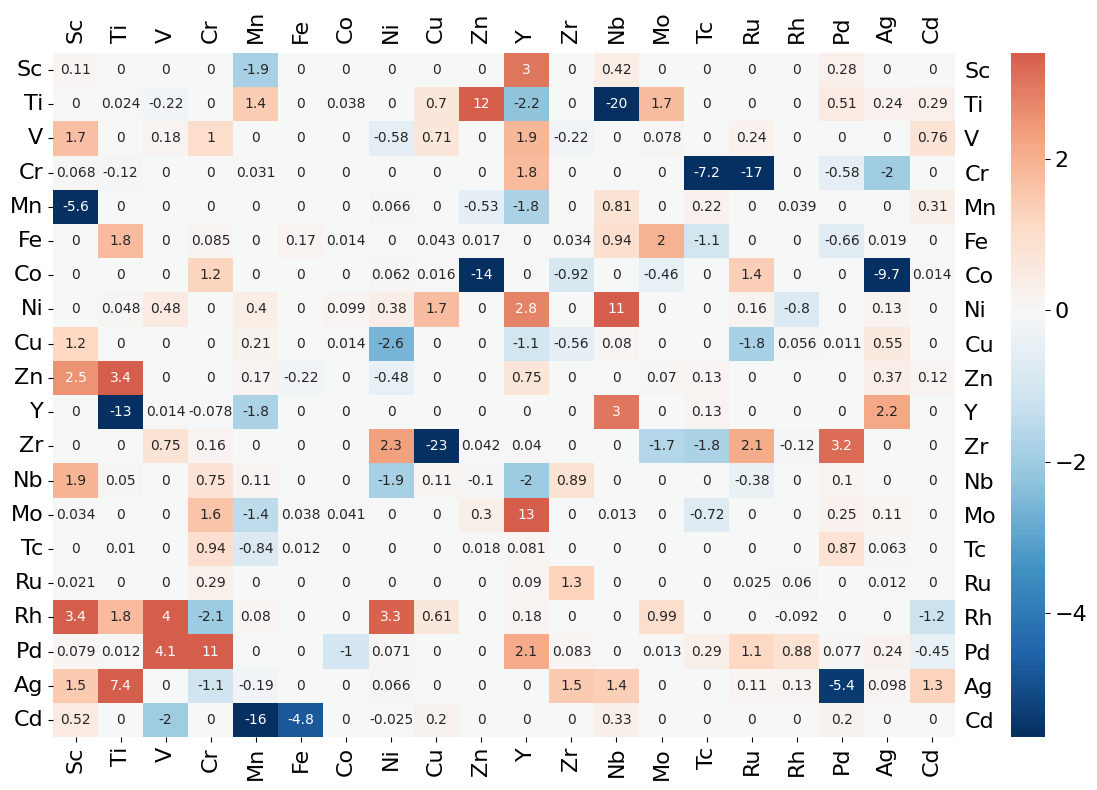

In [798]:
# set CM as features
#x = coulomb_matrix

# set J as target labels
#y = table.iloc[:,8]

y_pred3 = grid_search.predict(x) # make prediction on FULL CM feature matrix!
y_abs_err = np.abs(y - y_pred3)
heatmap_matrix_parity, missing_defect_pairs = \
  sisclab22p6.target_plotters.create_heatmap_matrix(table, value_array=y, ilayer1= 3,
                          offset1=1, aggregate_function='mean')

# plot heatmap and save
sisclab22p6.target_plotters.plot_heatmap(heatmap_matrix_parity, publication_target='slides', fontsize='small')
plt.savefig('fig/parity-heatmap-Jij.pdf')

### Compare both linear regression and KRR parity plot

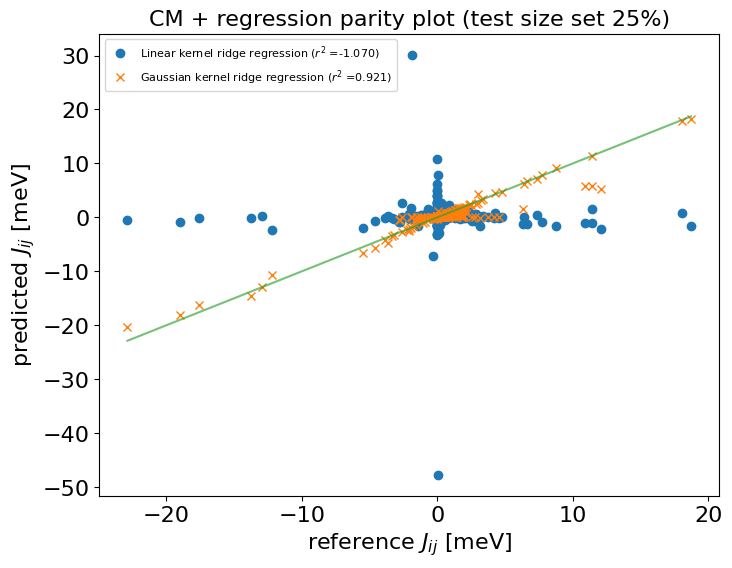

In [825]:
# do the regression parity plot
plt.plot(y_test, y_pred1, 'o', label="Linear kernel ridge regression ($r^{2}$ =%.3f)" % r2_score(y_test, y_pred1))
plt.plot(y_test, y_pred2, 'x', label="Gaussian kernel ridge regression ($r^{2}$ =%.3f)" % r2_score(y_test, y_pred2))
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-', alpha=0.65)
plt.title("CM + regression parity plot (test size set 25%)")
plt.xlabel('reference $J_{ij}$ [meV]')
plt.ylabel('predicted $J_{ij}$ [meV]')
plt.legend(loc="upper left", prop={'size': 8})
plt.gcf().set_size_inches(8, 6)
#plt.show()

plt.savefig('fig/CM_parity_plot.pdf')

### KKR and set test size = 0.35

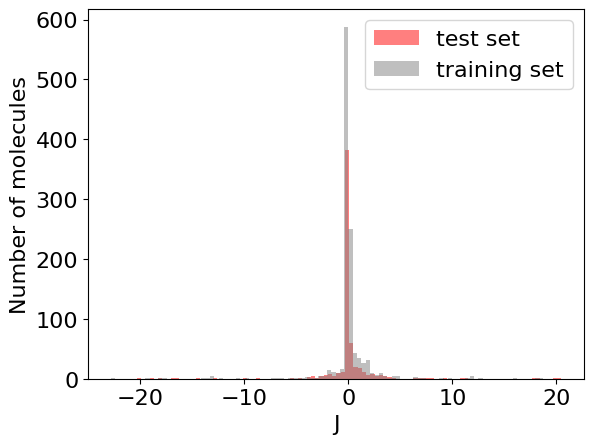

In [365]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
plt.xlabel("J")
plt.ylabel("Number of molecules")
plt.legend()
plt.show()

In [366]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

alpha = np.logspace(-4, -2, 3)
gamma = np.logspace(-4, -2, 3)

cv_number = 3 ## choose into how many parts training set is divided for cross-validation
kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

## define settings for grid search routine in scikit-learn with above defined grids as input

grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                           cv = cv_number, 
                           scoring = scoring_function,
                           verbose=3)  ## produces detailed output statements of grid search 
                                          # routine so we can see what is computed
    
# call the fit function in scikit-learn which fits the Coulomb matrices in the training set 
# to their corresponding Jij.
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.571 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.463 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.547 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.700 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.540 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.580 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.700 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.540 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.580 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.571 total time=   0.1s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.463 total time=   0.2s
[CV 3

GridSearchCV(cv=3, estimator=KernelRidge(),
             param_grid=[{'alpha': array([0.0001, 0.001 , 0.01  ]),
                          'gamma': array([0.0001, 0.001 , 0.01  ]),
                          'kernel': ['rbf']}],
             scoring='neg_mean_absolute_error', verbose=3)

Mean absolute error on test set: 0.371 eV


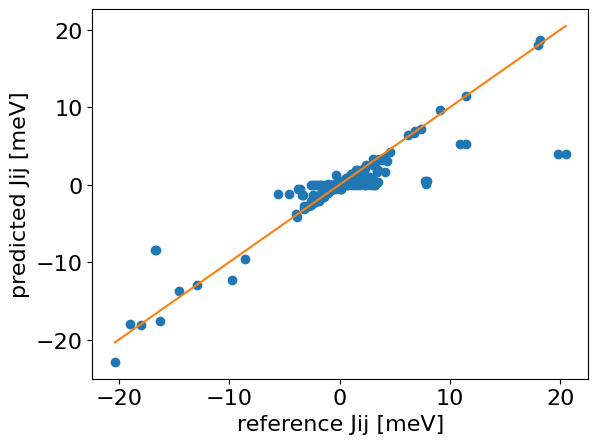

R^2 score on test set: 0.788


In [367]:
# predicted Jij for all test molecules

y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                     # of hyperparameters from grid search

print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

# do the regression plot
plt.plot(y_test, y_pred, 'o')
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
plt.xlabel('reference Jij [meV]')
plt.ylabel('predicted Jij [meV]')
plt.show()
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred))

## SOAP

### Method 1: Concatenate SOAP vector

In [832]:
# get structures from table
structures =  list(table.structure)
samples = structures

# get arrays indices of defect atoms
# assumption: all defect atoms are transition metals and have atomic numbers < host crystal atomic numbers (Bi: 83, Te: 52)
defect_atoms_indices = [list(np.asarray(struc.numbers < 52).nonzero()[0]) for struc in structures]
# check that all index pairs are equal, if so, flatten the list
if not all(index_pair == defect_atoms_indices[0] for index_pair in defect_atoms_indices):
    raise Exception("Not all defect atoms indices equal. Have to do by-case featurization.")
defect_atoms_indices = defect_atoms_indices[0]

# get Euclidean coordinates of the defect atoms
positions = [[struc.positions[idx] for idx in defect_atoms_indices] for struc in structures]
# DScribe SOAP needs positions per structure. So do not flatten the list, as we did with indices.

In [833]:
# get chemical species present in the input structures.
species = set(np.concatenate([np.unique(struc.numbers) for struc in structures]))

#### KKR and set test size = 0.1

In [243]:
# c = list(zip(x, y))
# random.shuffle(c)

# x, y = zip(*c)

# x = np.array(x)
# y = np.array(y)

In [ ]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

r_cut = 4.0
sigma = 1.0

for n_max in range(1,8):
    for l_max in range(1,8):
        # set up SOAP features using the parameter you change
        soap = SOAP(r_cut= r_cut,
                     n_max= n_max, 
                     l_max= l_max, 
                     sigma= sigma, 
                     rbf= "gto", 
                     weighting= None, 
                     crossover= True, 
                     average= "off", 
                     species= species, 
                     periodic= False, 
                     sparse= False, 
                     dtype= "float64"    
                     )
    
        # then do the model training and evaluation
        samples = structures
        positions = np.zeros((len(samples),1), dtype=int)

        #n_features = soap.get_number_of_features()

        positions = [[0,7] for i in range(len(samples))]

        soap = soap.create(samples, positions, n_jobs=2)  # Parallel
    
        # set soap as features
        x = soap

        # set J as target labels
        y = table.iloc[:,8]
        
        #reshape feature x from (1730,2,10080) to (1730, 20160) by concatenating two vectors
        b = []
        for i in range(len(samples)):
            a = np.concatenate((x[i,0],x[i,1]), axis=None)
            b.append(a)
        x=b

        # Standarization
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
    
        #c = list(zip(x, y))
        #random.shuffle(c)

        #x, y = zip(*c)

        #x = np.array(x)
        #y = np.array(y)
        
        print("n_max= %d, l_max=%d \n" % (n_max, l_max))
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

        #plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
        #plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
        #plt.xlabel("J")
        #plt.ylabel("Number of molecules")
        #plt.legend()
        #plt.show()
    
        alpha = np.logspace(-4, -2, 3)
        gamma = np.logspace(-4, -2, 3)

        cv_number = 3 ## choose into how many parts training set is divided for cross-validation
        kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
        scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

        ## define settings for grid search routine in scikit-learn with above defined grids as input

        grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                                   [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                                   cv = cv_number, 
                                   scoring = scoring_function,
                                   verbose=3)  ## produces detailed output statements of grid search 
                                                  # routine so we can see what is computed
    
        # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
    
        # predicted Jij for all test molecules

        y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                             # of hyperparameters from grid search

        print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

        # do the regression plot
        plt.plot(y_test, y_pred, 'o')
        plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
        plt.xlabel('reference Jij [eV]')
        plt.ylabel('predicted Jij [eV]')
        plt.show()
        print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred))
        print("---------------------------------------------------------")

#### KKR and set test size = 0.25

n_max= 1, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.940 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.949 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.977 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.886 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.869 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.909 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.961 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.906 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.971 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.051 total time=   0.1s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.102 tota

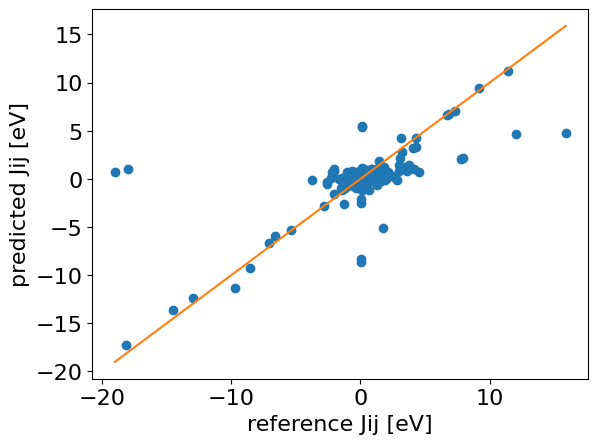

R^2 score on test set: 0.490 

---------------------------------------------------------
n_max= 1, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.975 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.986 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.971 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.916 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.910 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.915 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.019 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.981 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.008 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.076 

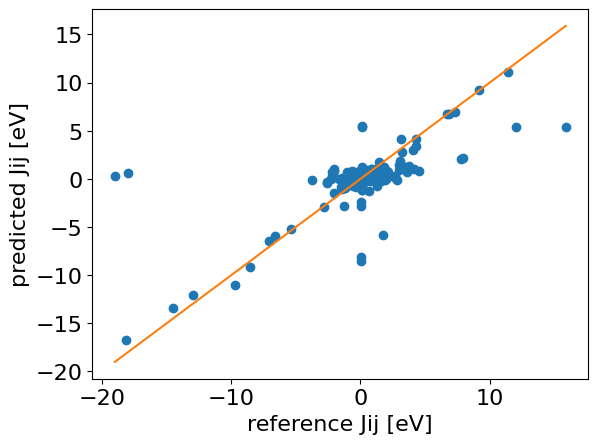

R^2 score on test set: 0.503 

---------------------------------------------------------
n_max= 1, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.993 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.002 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.973 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.930 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.928 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.920 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.045 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.025 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.045 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.092 

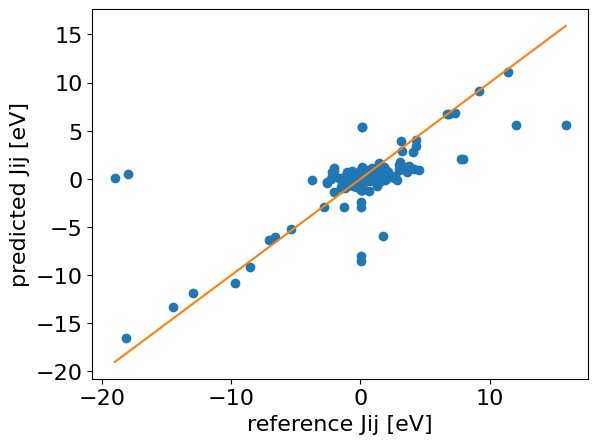

R^2 score on test set: 0.507 

---------------------------------------------------------
n_max= 1, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.998 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.008 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.975 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.948 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.948 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.927 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.066 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.055 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.068 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.105 

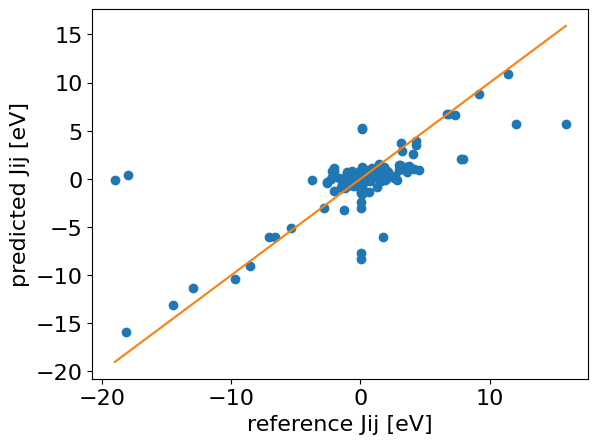

R^2 score on test set: 0.511 

---------------------------------------------------------
n_max= 1, l_max=5 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.002 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.013 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.976 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.961 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.963 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.935 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.090 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.081 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.090 total time=   0.4s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.115 

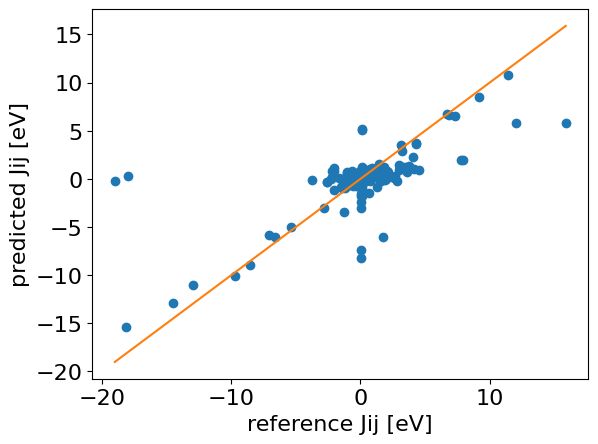

R^2 score on test set: 0.513 

---------------------------------------------------------
n_max= 1, l_max=6 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.005 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.016 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.978 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.978 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.980 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.944 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.111 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.106 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.109 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.121 

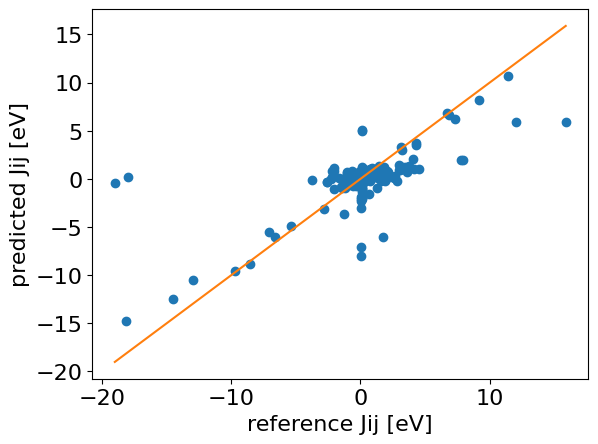

R^2 score on test set: 0.512 

---------------------------------------------------------
n_max= 1, l_max=7 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.008 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.020 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.979 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.993 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.998 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.954 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.129 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.123 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.123 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.126 

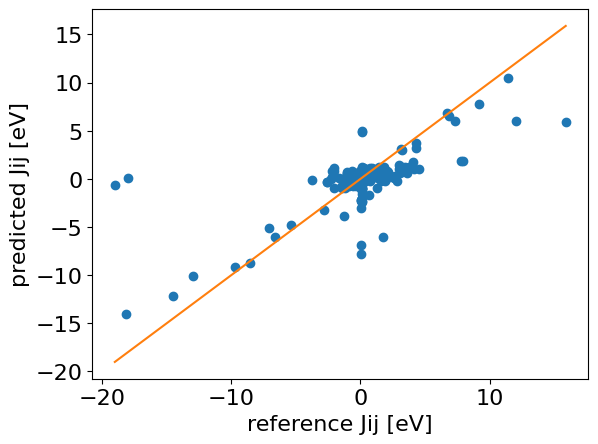

R^2 score on test set: 0.509 

---------------------------------------------------------
n_max= 2, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.052 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.024 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.005 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.019 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.951 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.932 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.139 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.104 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.171 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.077 

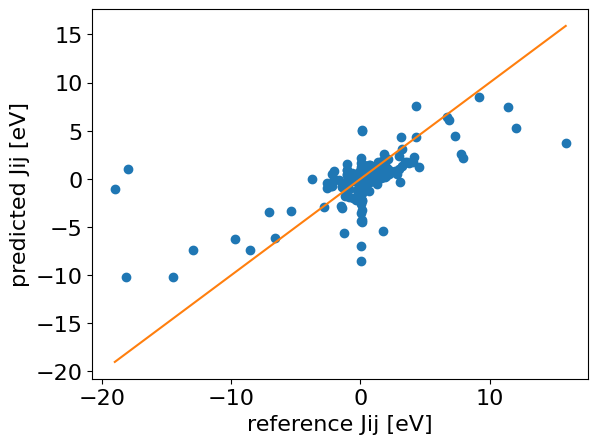

R^2 score on test set: 0.425 

---------------------------------------------------------
n_max= 2, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.096 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.074 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.004 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.038 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.006 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.945 total time=   0.4s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.156 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.152 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.182 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.108 

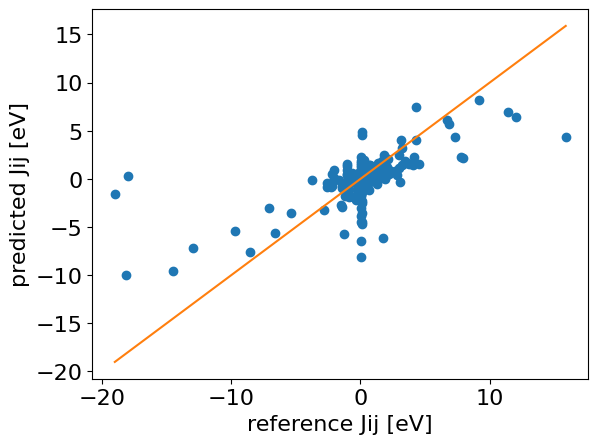

R^2 score on test set: 0.434 

---------------------------------------------------------
n_max= 2, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.119 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.096 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.014 total time=   0.4s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.051 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.029 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.970 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.170 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.172 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.178 total time=   0.4s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.134 

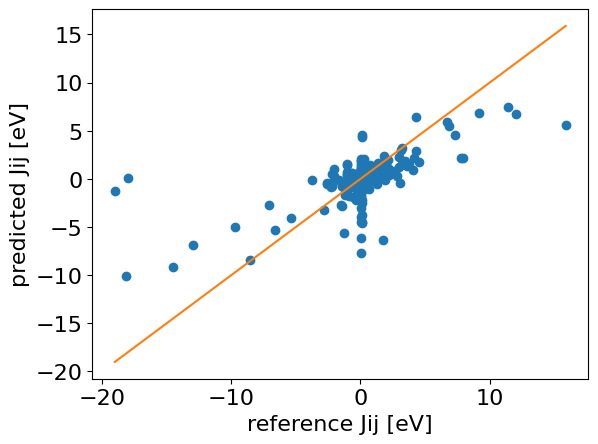

R^2 score on test set: 0.440 

---------------------------------------------------------
n_max= 2, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.123 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.103 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.019 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.060 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.048 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.987 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.158 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.174 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.189 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.141 

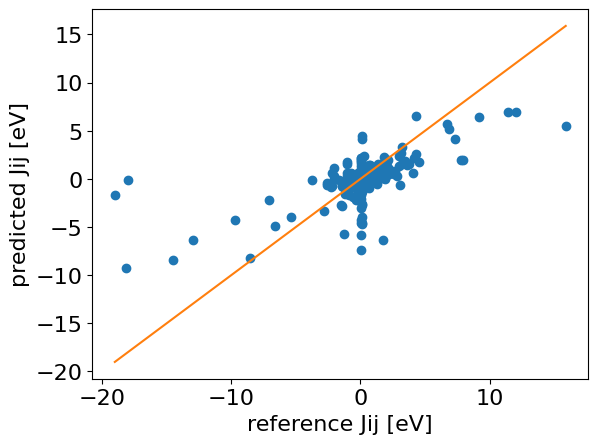

R^2 score on test set: 0.423 

---------------------------------------------------------
n_max= 2, l_max=5 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.126 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.108 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.023 total time=   0.4s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.061 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.060 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.997 total time=   0.4s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.166 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.171 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.186 total time=   0.5s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.150 

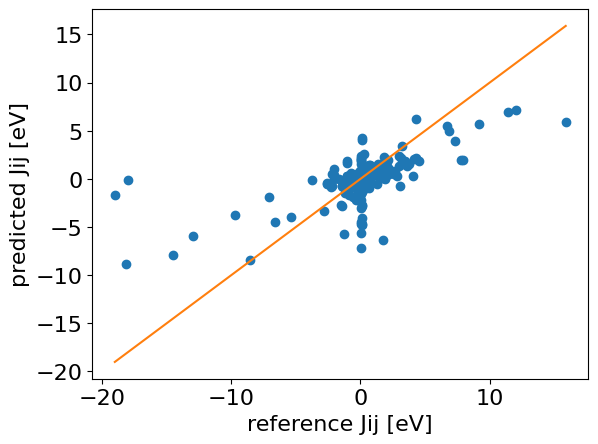

R^2 score on test set: 0.412 

---------------------------------------------------------
n_max= 2, l_max=6 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.128 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.114 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.026 total time=   0.4s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.075 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.078 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.013 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.154 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.162 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.187 total time=   0.5s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.153 

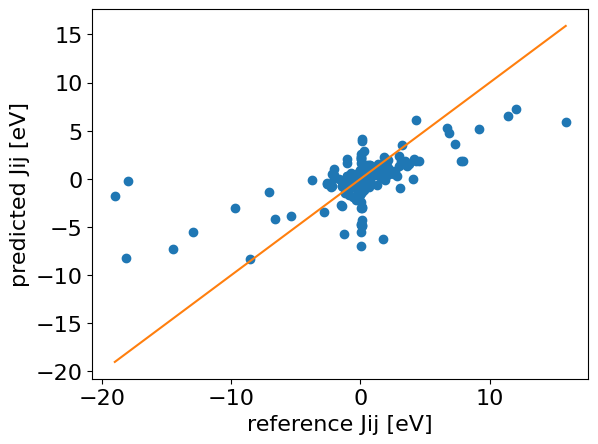

R^2 score on test set: 0.389 

---------------------------------------------------------
n_max= 2, l_max=7 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.130 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.119 total time=   0.6s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.030 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.090 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.095 total time=   0.6s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.027 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.143 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.147 total time=   0.6s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.181 total time=   0.6s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.156 

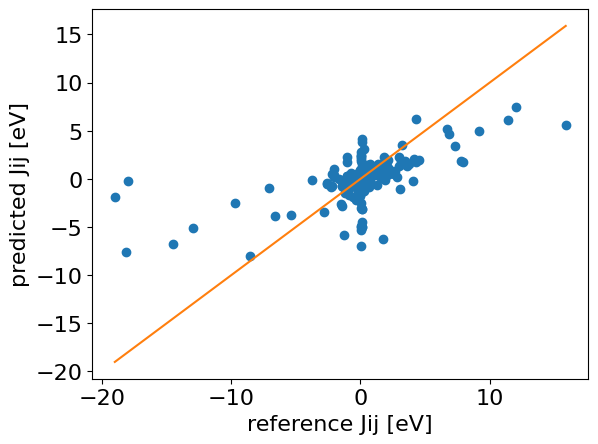

R^2 score on test set: 0.363 

---------------------------------------------------------
n_max= 3, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.107 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.061 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.016 total time=   0.4s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.096 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.035 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.009 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.157 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.161 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.238 total time=   0.4s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.105 

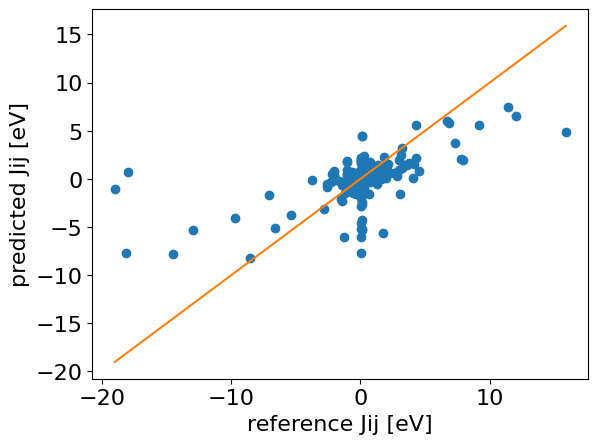

R^2 score on test set: 0.364 

---------------------------------------------------------
n_max= 3, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.146 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.117 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.022 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.109 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.067 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.022 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.139 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.150 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.211 total time=   0.5s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.137 

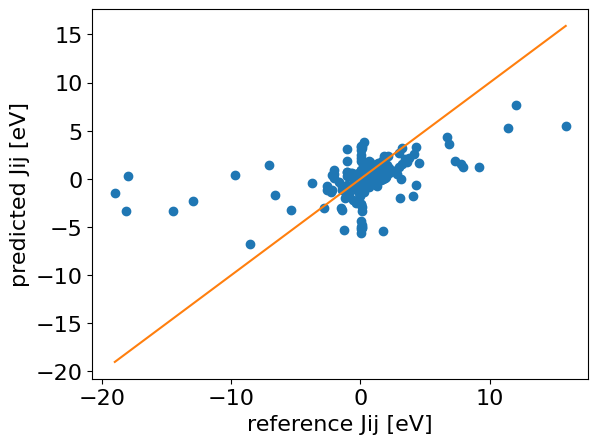

R^2 score on test set: 0.204 

---------------------------------------------------------
n_max= 3, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.159 total time=   0.6s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.136 total time=   0.6s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.032 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.112 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.088 total time=   0.6s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.060 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.131 total time=   0.6s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.126 total time=   0.6s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.167 total time=   0.6s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.163 

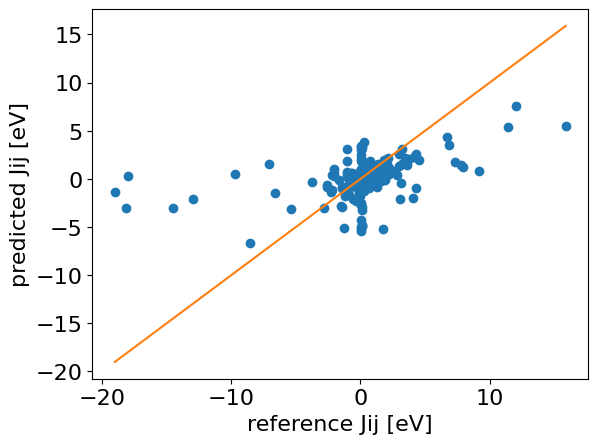

R^2 score on test set: 0.188 

---------------------------------------------------------
n_max= 3, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.161 total time=   0.6s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.145 total time=   0.6s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.038 total time=   0.7s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.114 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.103 total time=   0.6s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.071 total time=   0.6s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.077 total time=   0.6s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.081 total time=   0.6s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.166 total time=   0.7s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.170 

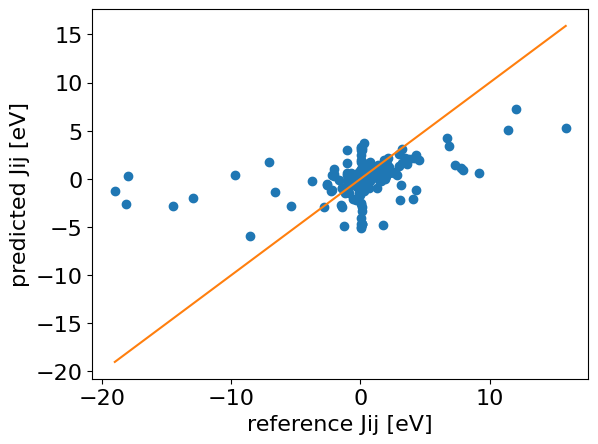

R^2 score on test set: 0.178 

---------------------------------------------------------
n_max= 3, l_max=5 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.161 total time=   0.7s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.150 total time=   0.7s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.042 total time=   0.8s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.118 total time=   0.8s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.116 total time=   0.7s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.080 total time=   0.8s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.072 total time=   0.7s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.061 total time=   0.7s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.148 total time=   0.7s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.177 

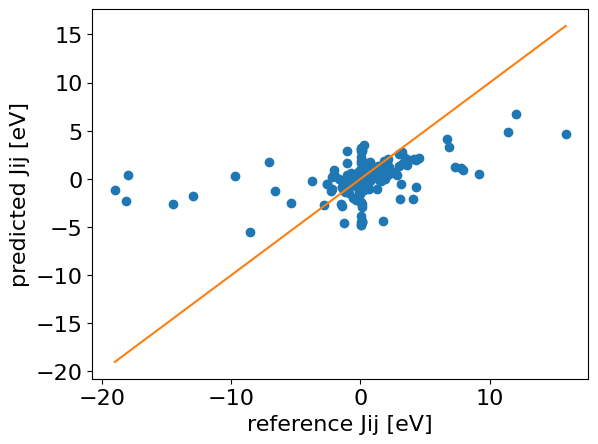

R^2 score on test set: 0.171 

---------------------------------------------------------
n_max= 3, l_max=6 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.162 total time=   0.8s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.156 total time=   0.7s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.047 total time=   0.9s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.130 total time=   0.9s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.131 total time=   0.9s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.092 total time=   0.9s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.036 total time=   0.9s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.022 total time=   0.9s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.139 total time=   0.9s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.180 

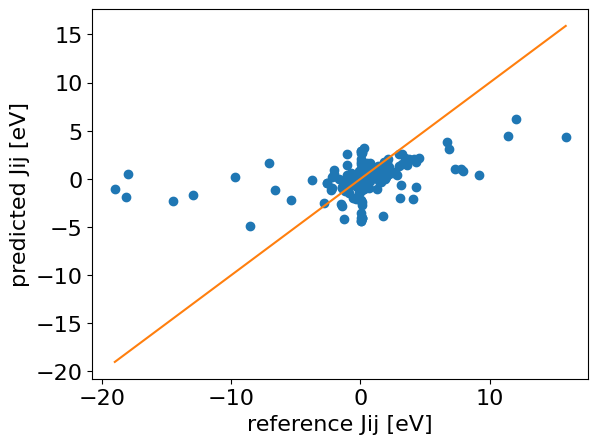

R^2 score on test set: 0.169 

---------------------------------------------------------
n_max= 3, l_max=7 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.164 total time=   0.9s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.163 total time=   0.9s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.053 total time=   0.8s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.141 total time=   0.9s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.141 total time=   0.9s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.101 total time=   0.9s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.004 total time=   0.8s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.984 total time=   0.8s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.123 total time=   0.8s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.183 

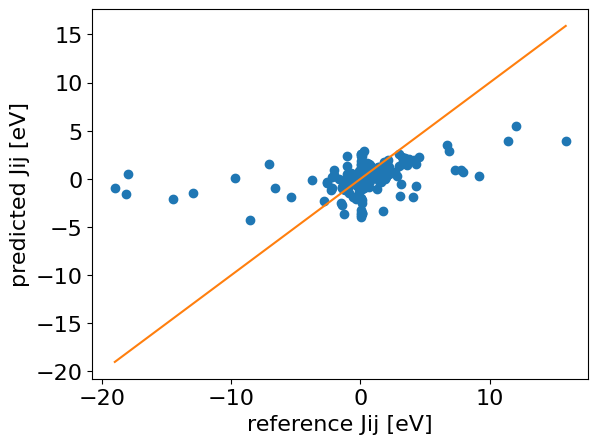

R^2 score on test set: 0.166 

---------------------------------------------------------
n_max= 4, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.094 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.045 total time=   0.6s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.985 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.110 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.070 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.069 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.065 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.085 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.146 total time=   0.5s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.109 

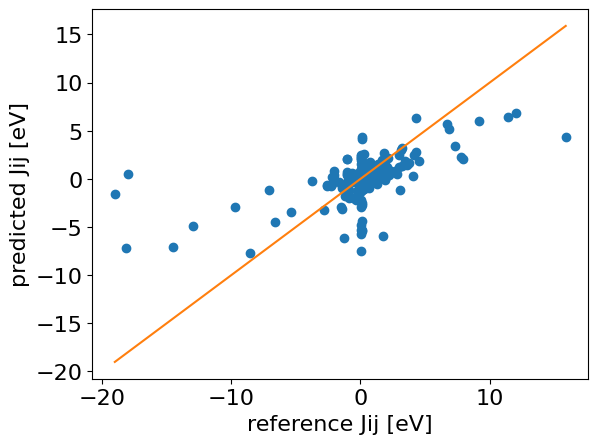

R^2 score on test set: 0.350 

---------------------------------------------------------
n_max= 4, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits


KeyboardInterrupt: 

In [369]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

r_cut = 4.0
sigma = 1.0

for n_max in range(1,8):
    for l_max in range(1,8):
        # set up SOAP features using the parameter you change
        soap = SOAP(r_cut= r_cut,
                     n_max= n_max, 
                     l_max= l_max, 
                     sigma= sigma, 
                     rbf= "gto", 
                     weighting= None, 
                     crossover= True, 
                     average= "off", 
                     species= species, 
                     periodic= False, 
                     sparse= False, 
                     dtype= "float64"    
                     )
    
        # then do the model training and evaluation
        samples = structures
        positions = np.zeros((len(samples),1), dtype=int)

        #n_features = soap.get_number_of_features()

        positions = [[0,7] for i in range(len(samples))]

        soap = soap.create(samples, positions, n_jobs=2)  # Parallel
    
        # set soap as features
        x = soap

        # set J as target labels
        y = table.iloc[:,8]
    
         #reshape feature x from (1730,2,10080) to (1730, 20160) by concatenating two vectors
        b = []
        for i in range(len(samples)):
            a = np.concatenate((x[i,0],x[i,1]), axis=None)
            b.append(a)
        x=b

        # Standarization
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
    
        #c = list(zip(x, y))
        #random.shuffle(c)

        #x, y = zip(*c)

        #x = np.array(x)
        #y = np.array(y)
        
        print("n_max= %d, l_max=%d \n" % (n_max, l_max))
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

        #plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
        #plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
        #plt.xlabel("J")
        #plt.ylabel("Number of molecules")
        #plt.legend()
        #plt.show()
    
        alpha = np.logspace(-4, -2, 3)
        gamma = np.logspace(-4, -2, 3)

        cv_number = 3 ## choose into how many parts training set is divided for cross-validation
        kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
        scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

        ## define settings for grid search routine in scikit-learn with above defined grids as input

        grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                                   [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                                   cv = cv_number, 
                                   scoring = scoring_function,
                                   verbose=3)  ## produces detailed output statements of grid search 
                                                  # routine so we can see what is computed
    
        # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
    
        # predicted Jij for all test molecules

        y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                             # of hyperparameters from grid search

        print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

        # do the regression plot
        plt.plot(y_test, y_pred, 'o')
        plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
        plt.xlabel('reference Jij [eV]')
        plt.ylabel('predicted Jij [eV]')
        plt.show()
        print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred))
        print("---------------------------------------------------------")

#### KKR and set test size = 0.35

In [ ]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

r_cut = 4.0
sigma = 1.0

for n_max in range(1,8):
    for l_max in range(1,8):
        # set up SOAP features using the parameter you change
        soap = SOAP(r_cut= r_cut,
                     n_max= n_max, 
                     l_max= l_max, 
                     sigma= sigma, 
                     rbf= "gto", 
                     weighting= None, 
                     crossover= True, 
                     average= "off", 
                     species= species, 
                     periodic= False, 
                     sparse= False, 
                     dtype= "float64"    
                     )
    
        # then do the model training and evaluation
        samples = structures
        positions = np.zeros((len(samples),1), dtype=int)

        #n_features = soap.get_number_of_features()

        positions = [[0,7] for i in range(len(samples))]

        soap = soap.create(samples, positions, n_jobs=2)  # Parallel
    
        # set soap as features
        x = soap

        # set J as target labels
        y = table.iloc[:,8]
    
         #reshape feature x from (1730,2,10080) to (1730, 20160) by concatenating two vectors
        b = []
        for i in range(len(samples)):
            a = np.concatenate((x[i,0],x[i,1]), axis=None)
            b.append(a)
        x=b

        # Standarization
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
    
        #c = list(zip(x, y))
        #random.shuffle(c)

        #x, y = zip(*c)

        #x = np.array(x)
        #y = np.array(y)
        
        print("n_max= %d, l_max=%d \n" % (n_max, l_max))
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

        #plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
        #plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
        #plt.xlabel("J")
        #plt.ylabel("Number of molecules")
        #plt.legend()
        #plt.show()
    
        alpha = np.logspace(-4, -2, 3)
        gamma = np.logspace(-4, -2, 3)

        cv_number = 3 ## choose into how many parts training set is divided for cross-validation
        kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
        scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

        ## define settings for grid search routine in scikit-learn with above defined grids as input

        grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                                   [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                                   cv = cv_number, 
                                   scoring = scoring_function,
                                   verbose=3)  ## produces detailed output statements of grid search 
                                                  # routine so we can see what is computed
    
        # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
    
        # predicted Jij for all test molecules

        y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                             # of hyperparameters from grid search

        print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

        # do the regression plot
        plt.plot(y_test, y_pred, 'o')
        plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
        plt.xlabel('reference Jij [eV]')
        plt.ylabel('predicted Jij [eV]')
        plt.show()
        print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred))
        print("---------------------------------------------------------")

### Method 2: Use parameter average = 'inner function'

#### Linear KRR and set test size =0.25

In [839]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

n_max = 2
l_max = 3
r_cut = 6.0
sigma = 0.4
# set up SOAP features using the parameter you change
soap2 = SOAP(r_cut= r_cut,
            n_max= n_max, 
            l_max= l_max, 
            sigma= sigma, 
            rbf= "gto", 
            weighting= None, 
            crossover= True, 
            average= "inner", 
            species= species, 
            periodic= False, 
            sparse= False, 
            dtype= "float64"    
            )
    
# then do the model training and evaluation
samples = structures
positions = np.zeros((len(samples),1), dtype=int)

#n_features = soap.get_number_of_features()

positions = [[0,7] for i in range(len(samples))]
soap2 = soap2.create(samples, positions, n_jobs=2)  # Parallel
    
# set soap as features
x = soap2

# set J as target labels
y = table.iloc[:,8]

#shuffle data
c = list(zip(x, y))
random.shuffle(c)
x, y = zip(*c)
x = np.array(x)
y = np.array(y)

In [840]:
# Standarization
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

print("r_cut=%d n_max= %d, l_max=%d sigma=%0.1f\n" % (r_cut, n_max, l_max, sigma))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) #test size=0.25

alpha = np.logspace(-4, -2, 3)
gamma = np.logspace(-4, -2, 3)

cv_number = 3
kernel = 'linear'
scoring_function = 'neg_mean_absolute_error'
grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                           cv = cv_number, 
                           scoring = scoring_function,
                           verbose=3) 
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

# predicted Jij for all test molecules

y_pred1 = grid_search.predict(x_test)

print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred1-y_test)).mean())
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred1))

r_cut=6 n_max= 2, l_max=3 sigma=0.4

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=linear;, score=-1.298 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=linear;, score=-1.708 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=linear;, score=-1.476 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=linear;, score=-1.298 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=linear;, score=-1.708 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=linear;, score=-1.476 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=linear;, score=-1.298 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=linear;, score=-1.708 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=linear;, score=-1.476 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=linear;, score=-0.776 total time=   0.2s
[CV 2/3] END alpha=0.00

#### KKR and set test size = 0.1

In [674]:
c = list(zip(x, y))
random.shuffle(c)

x, y = zip(*c)

x = np.array(x)
y = np.array(y)

In [ ]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

r_cut = 4.0
sigma = 1.0

for n_max in range(1,9):
    for l_max in range(1,9):
        # set up SOAP features using the parameter you change
        soap2 = SOAP(r_cut= r_cut,
                     n_max= n_max, 
                     l_max= l_max, 
                     sigma= sigma, 
                     rbf= "gto", 
                     weighting= None, 
                     crossover= True, 
                     average= "inner", 
                     species= species, 
                     periodic= False, 
                     sparse= False, 
                     dtype= "float64"    
                     )
    
        # then do the model training and evaluation
        samples = structures
        positions = np.zeros((len(samples),1), dtype=int)

        #n_features = soap.get_number_of_features()

        positions = [[0,7] for i in range(len(samples))]

        soap2 = soap2.create(samples, positions, n_jobs=2)  # Parallel
    
        # set soap as features
        x = soap2

        # set J as target labels
        y = table.iloc[:,8]
      

        # Standarization
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
    
        #c = list(zip(x, y))
        #random.shuffle(c)

        #x, y = zip(*c)

        #x = np.array(x)
        #y = np.array(y)
        
        print("n_max= %d, l_max=%d \n" % (n_max, l_max))
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

        #plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
        #plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
        #plt.xlabel("J")
        #plt.ylabel("Number of molecules")
        #plt.legend()
        #plt.show()
    
        alpha = np.logspace(-4, -2, 3)
        gamma = np.logspace(-4, -2, 3)

        cv_number = 3 ## choose into how many parts training set is divided for cross-validation
        kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
        scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

        ## define settings for grid search routine in scikit-learn with above defined grids as input

        grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                                   [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                                   cv = cv_number, 
                                   scoring = scoring_function,
                                   verbose=3)  ## produces detailed output statements of grid search 
                                                  # routine so we can see what is computed
    
        # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
    
        # predicted Jij for all test molecules

        y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                             # of hyperparameters from grid search

        print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

        # do the regression plot
        plt.plot(y_test, y_pred, 'o')
        plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
        plt.xlabel('reference Jij [eV]')
        plt.ylabel('predicted Jij [eV]')
        plt.show()
        print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred))
        print("---------------------------------------------------------")

In [273]:
soap2.shape

(1730, 3612)

In [ ]:
import matplotlib.pyplot as plt

mat = soap2[rand_mol]

plt.figure()
plt.figure(figsize = (6,6))
plt.imshow(mat, origin="upper", cmap='rainbow')#, vmin=-15, vmax=90, interpolation='nearest')
plt.colorbar(fraction=0.046, pad=0.04).ax.tick_params(labelsize=20)
plt.axis('on')
#plt.show()

plt.savefig('fig/soap2_small.png', dpi=100, bbox_inches="tight")

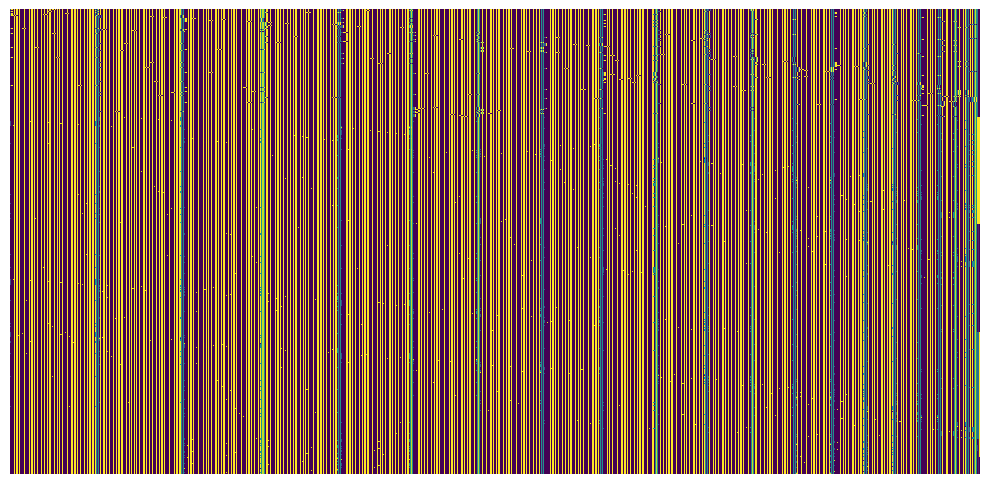

In [247]:
# Visualize SOAP Matrix

sisclab22p6.features_plotters.plot_feature_matrix(soap2, transpose=False)#, filepath='fig/X_soap.pdf')
plt.savefig('fig/soap2.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

#### KKR and set test size = 0.25

In [ ]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

r_cut = 4.0
sigma = 1.0

for n_max in range(1,9):
    for l_max in range(1,9):
        # set up SOAP features using the parameter you change
        soap2 = SOAP(r_cut= r_cut,
                     n_max= n_max, 
                     l_max= l_max, 
                     sigma= sigma, 
                     rbf= "gto", 
                     weighting= None, 
                     crossover= True, 
                     average= "inner", 
                     species= species, 
                     periodic= False, 
                     sparse= False, 
                     dtype= "float64"    
                     )
    
        # then do the model training and evaluation
        samples = structures
        positions = np.zeros((len(samples),1), dtype=int)

        #n_features = soap.get_number_of_features()

        positions = [[0,7] for i in range(len(samples))]

        soap2 = soap2.create(samples, positions, n_jobs=2)  # Parallel
    
        # set soap as features
        x = soap2

        # set J as target labels
        y = table.iloc[:,8]
    
        # Standarization
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
    
        #c = list(zip(x, y))
        #random.shuffle(c)

        #x, y = zip(*c)

        #x = np.array(x)
        #y = np.array(y)
        
        print("n_max= %d, l_max=%d \n" % (n_max, l_max))
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

        #plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
        #plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
        #plt.xlabel("J")
        #plt.ylabel("Number of molecules")
        #plt.legend()
        #plt.show()
    
        alpha = np.logspace(-4, -2, 3)
        gamma = np.logspace(-4, -2, 3)

        cv_number = 3 ## choose into how many parts training set is divided for cross-validation
        kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
        scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

        ## define settings for grid search routine in scikit-learn with above defined grids as input

        grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                                   [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                                   cv = cv_number, 
                                   scoring = scoring_function,
                                   verbose=3)  ## produces detailed output statements of grid search 
                                                  # routine so we can see what is computed
    
        # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
    
        # predicted Jij for all test molecules

        y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                             # of hyperparameters from grid search

        print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

        # do the regression plot
        plt.plot(y_test, y_pred, 'o')
        plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
        plt.xlabel('reference Jij [eV]')
        plt.ylabel('predicted Jij [eV]')
        plt.show()
        print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred))
        print("---------------------------------------------------------")

n_max= 2, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.736 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.822 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.846 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.725 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.793 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.826 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.781 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.893 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.895 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.813 total time=   0.3s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.923 tota

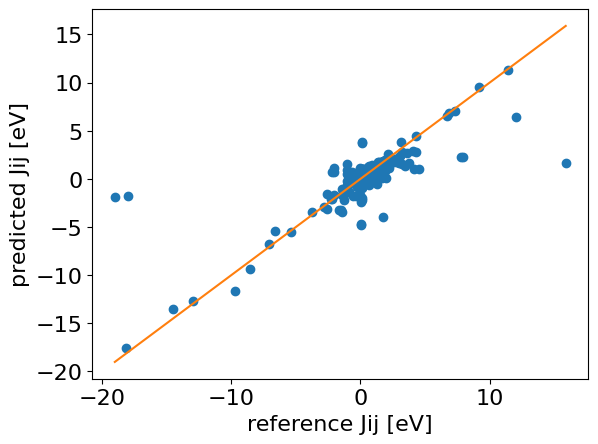

R^2 score on test set: 0.615 

---------------------------------------------------------


In [376]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

r_cut = 6.0
sigma = 0.4
n_max = 2
l_max =3
        # set up SOAP features using the parameter you change
soap2 = SOAP(r_cut= r_cut,
                     n_max= n_max, 
                     l_max= l_max, 
                     sigma= sigma, 
                     rbf= "gto", 
                     weighting= None, 
                     crossover= True, 
                     average= "inner", 
                     species= species, 
                     periodic= False, 
                     sparse= False, 
                     dtype= "float64"    
                     )
    
        # then do the model training and evaluation
samples = structures
positions = np.zeros((len(samples),1), dtype=int)

        #n_features = soap.get_number_of_features()

positions = [[0,7] for i in range(len(samples))]

soap2 = soap2.create(samples, positions, n_jobs=2)  # Parallel
    
        # set soap as features
x = soap2

        # set J as target labels
y = table.iloc[:,8]
    
        # Standarization
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
    
        #c = list(zip(x, y))
        #random.shuffle(c)

        #x, y = zip(*c)

        #x = np.array(x)
        #y = np.array(y)
        
print("n_max= %d, l_max=%d \n" % (n_max, l_max))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

        #plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
        #plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
        #plt.xlabel("J")
        #plt.ylabel("Number of molecules")
        #plt.legend()
        #plt.show()
    
alpha = np.logspace(-4, -2, 3)
gamma = np.logspace(-4, -2, 3)

cv_number = 3 ## choose into how many parts training set is divided for cross-validation
kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

        ## define settings for grid search routine in scikit-learn with above defined grids as input

grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                                   [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                                   cv = cv_number, 
                                   scoring = scoring_function,
                                   verbose=3)  ## produces detailed output statements of grid search 
                                                  # routine so we can see what is computed
    
        # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
    
        # predicted Jij for all test molecules

y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                             # of hyperparameters from grid search

print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

        # do the regression plot
plt.plot(y_test, y_pred, 'o')
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
plt.xlabel('reference Jij [eV]')
plt.ylabel('predicted Jij [eV]')
plt.show()
print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred))
print("---------------------------------------------------------")

#### KKR and set test size = 0.35

In [ ]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

r_cut = 4.0
sigma = 1.0

for n_max in range(1,9):
    for l_max in range(1,9):
        # set up SOAP features using the parameter you change
        soap2 = SOAP(r_cut= r_cut,
                     n_max= n_max, 
                     l_max= l_max, 
                     sigma= sigma, 
                     rbf= "gto", 
                     weighting= None, 
                     crossover= True, 
                     average= "inner", 
                     species= species, 
                     periodic= False, 
                     sparse= False, 
                     dtype= "float64"    
                     )
    
        # then do the model training and evaluation
        samples = structures
        positions = np.zeros((len(samples),1), dtype=int)

        #n_features = soap.get_number_of_features()

        positions = [[0,7] for i in range(len(samples))]

        soap2 = soap2.create(samples, positions, n_jobs=2)  # Parallel
    
        # set soap as features
        x = soap2

        # set J as target labels
        y = table.iloc[:,8]

        # Standarization
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
    
        #c = list(zip(x, y))
        #random.shuffle(c)

        #x, y = zip(*c)

        #x = np.array(x)
        #y = np.array(y)
        
        print("n_max= %d, l_max=%d \n" % (n_max, l_max))
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

        #plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
        #plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
        #plt.xlabel("J")
        #plt.ylabel("Number of molecules")
        #plt.legend()
        #plt.show()
    
        alpha = np.logspace(-4, -2, 3)
        gamma = np.logspace(-4, -2, 3)

        cv_number = 3 ## choose into how many parts training set is divided for cross-validation
        kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
        scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

        ## define settings for grid search routine in scikit-learn with above defined grids as input

        grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                                   [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                                   cv = cv_number, 
                                   scoring = scoring_function,
                                   verbose=3)  ## produces detailed output statements of grid search 
                                                  # routine so we can see what is computed
    
        # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
    
        # predicted Jij for all test molecules

        y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                             # of hyperparameters from grid search

        print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

        # do the regression plot
        plt.plot(y_test, y_pred, 'o')
        plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
        plt.xlabel('reference Jij [eV]')
        plt.ylabel('predicted Jij [eV]')
        plt.show()
        print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred))
        print("---------------------------------------------------------")

#### Test size =0.25, tuning r_cut, n_max, l_max and sigma

In [ ]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
import numpy as np

n_max = 2
l_max = 3

for r_cut in range(4,9,2):
    for sigma in np.arange(0.1,1.1,0.3):
        # set up SOAP features using the parameter you change
        soap2 = SOAP(r_cut= r_cut,
                    n_max= n_max, 
                    l_max= l_max, 
                    sigma= sigma, 
                    rbf= "gto", 
                    weighting= None, 
                    crossover= True, 
                    average= "inner", 
                    species= species, 
                    periodic= False, 
                    sparse= False, 
                    dtype= "float64"    
                    )
    
        # then do the model training and evaluation
        samples = structures
        positions = np.zeros((len(samples),1), dtype=int)

        #n_features = soap.get_number_of_features()

        positions = [[0,7] for i in range(len(samples))]

        soap2 = soap2.create(samples, positions, n_jobs=2)  # Parallel
    
        # set soap as features
        x = soap2

        # set J as target labels
        y = table.iloc[:,8]
    
        # Standarization
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
    
        #c = list(zip(x, y))
        #random.shuffle(c)

        #x, y = zip(*c)

        #x = np.array(x)
        #y = np.array(y)
        
        print("r_cut=%d n_max= %d, l_max=%d sigma=%0.1f\n" % (r_cut, n_max, l_max, sigma))
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

        #plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
        #plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
        #plt.xlabel("J")
        #plt.ylabel("Number of molecules")
        #plt.legend()
        #plt.show()
    
        alpha = np.logspace(-4, -2, 3)
        gamma = np.logspace(-4, -2, 3)

        cv_number = 3 ## choose into how many parts training set is divided for cross-validation
        kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
        scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

        ## define settings for grid search routine in scikit-learn with above defined grids as input

        grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                                           cv = cv_number, 
                                           scoring = scoring_function,
                                           verbose=3)  ## produces detailed output statements of grid search 
                                                          # routine so we can see what is computed
    
        # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
    
        # predicted Jij for all test molecules

        y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                                     # of hyperparameters from grid search

        print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

        # do the regression plot
        plt.plot(y_test, y_pred, 'o')
        plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
        plt.xlabel('reference Jij [eV]')
        plt.ylabel('predicted Jij [eV]')
        plt.show()
        print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred))
        print("---------------------------------------------------------")

In [ ]:
""""
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
import numpy as np

n_max = 2
l_max = 2
sigma = 0.54

for r_cut in range(4,9,2):
    # set up SOAP features using the parameter you change
    soap2 = SOAP(r_cut= r_cut,
                n_max= n_max, 
                l_max= l_max, 
                sigma= sigma, 
                rbf= "gto", 
                weighting= None, 
                crossover= True, 
                average= "inner", 
                species= species, 
                periodic= False, 
                sparse= False, 
                dtype= "float64"    
                )
    
    # then do the model training and evaluation
    samples = structures
    positions = np.zeros((len(samples),1), dtype=int)

    #n_features = soap.get_number_of_features()

    positions = [[0,7] for i in range(len(samples))]

    soap2 = soap2.create(samples, positions, n_jobs=2)  # Parallel
    
    # set soap as features
    x = soap2

    # set J as target labels
    y = table.iloc[:,8]
    
    # Standarization
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)
    
    #c = list(zip(x, y))
    #random.shuffle(c)

    #x, y = zip(*c)

    #x = np.array(x)
    #y = np.array(y)
        
    print("r_cut=%d n_max= %d, l_max=%d sigma=%0.1f\n" % (r_cut, n_max, l_max, sigma))
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

    #plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
    #plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
    #plt.xlabel("J")
    #plt.ylabel("Number of molecules")
    #plt.legend()
    #plt.show()
    
    alpha = np.logspace(-4, -2, 3)
    gamma = np.logspace(-4, -2, 3)

    cv_number = 3 ## choose into how many parts training set is divided for cross-validation
    kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
    scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

    ## define settings for grid search routine in scikit-learn with above defined grids as input

    grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                                [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                                cv = cv_number, 
                                scoring = scoring_function,
                                verbose=3)  ## produces detailed output statements of grid search 
                                            # routine so we can see what is computed
    
    # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
    grid_search.fit(x_train, y_train)
    print(grid_search.best_params_)
    
    # predicted Jij for all test molecules

    y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                                     # of hyperparameters from grid search

    print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

    # do the regression plot
    plt.plot(y_test, y_pred, 'o')
    plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
    plt.xlabel('reference Jij [eV]')
    plt.ylabel('predicted Jij [eV]')
    plt.show()
    print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred))
    print("---------------------------------------------------------")
"""

#### Test size =0.35, tuning r_cut, n_max, l_max and sigma

In [ ]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
import numpy as np


n_max = 3
l_max = 2

for r_cut in range(4,9,2):
    for sigma in np.arange(0.1,1.1,0.3):
        # set up SOAP features using the parameter you change
        soap2 = SOAP(r_cut= r_cut,
                    n_max= n_max, 
                    l_max= l_max, 
                    sigma= sigma, 
                    rbf= "gto", 
                    weighting= None, 
                    crossover= True, 
                    average= "inner", 
                    species= species, 
                    periodic= False, 
                    sparse= False, 
                    dtype= "float64"    
                    )
    
        # then do the model training and evaluation
        samples = structures
        positions = np.zeros((len(samples),1), dtype=int)

        #n_features = soap.get_number_of_features()

        positions = [[0,7] for i in range(len(samples))]

        soap2 = soap2.create(samples, positions, n_jobs=2)  # Parallel
    
        # set soap as features
        x = soap2

        # set J as target labels
        y = table.iloc[:,8]
    
        # Standarization
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
    
        #c = list(zip(x, y))
        #random.shuffle(c)

        #x, y = zip(*c)

        #x = np.array(x)
        #y = np.array(y)
        
        print("r_cut=%d n_max= %d, l_max=%d sigma=%0.1f\n" % (r_cut, n_max, l_max, sigma))
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

        #plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
        #plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
        #plt.xlabel("J")
        #plt.ylabel("Number of molecules")
        #plt.legend()
        #plt.show()
    
        alpha = np.logspace(-4, -2, 3)
        gamma = np.logspace(-4, -2, 3)

        cv_number = 3 ## choose into how many parts training set is divided for cross-validation
        kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
        scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

        ## define settings for grid search routine in scikit-learn with above defined grids as input

        grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                                           cv = cv_number, 
                                           scoring = scoring_function,
                                           verbose=3)  ## produces detailed output statements of grid search 
                                                          # routine so we can see what is computed
    
        # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
    
        # predicted Jij for all test molecules

        y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                                     # of hyperparameters from grid search

        print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

        # do the regression plot
        plt.plot(y_test, y_pred, 'o')
        plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
        plt.xlabel('reference Jij [eV]')
        plt.ylabel('predicted Jij [eV]')
        plt.show()
        print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred))
        print("---------------------------------------------------------")

#### Compare linear regression and KRR parity plot

In [836]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
import numpy as np


n_max = 2
l_max = 3
r_cut = 6.0
sigma = 0.4
# set up SOAP features using the parameter you change
soap2 = SOAP(r_cut= r_cut,
            n_max= n_max, 
            l_max= l_max, 
            sigma= sigma, 
            rbf= "gto", 
            weighting= None, 
            crossover= True, 
            average= "inner", 
            species= species, 
            periodic= False, 
            sparse= False, 
            dtype= "float64"    
            )
    
# then do the model training and evaluation
samples = structures
positions = np.zeros((len(samples),1), dtype=int)

#n_features = soap.get_number_of_features()
positions = [[0,7] for i in range(len(samples))]
soap2 = soap2.create(samples, positions, n_jobs=2)  # Parallel
    
# set soap as features
x = soap2

# set J as target labels
y = table.iloc[:,8]
    
# Standarization
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [841]:
print("r_cut=%d n_max= %d, l_max=%d sigma=%0.1f\n" % (r_cut, n_max, l_max, sigma))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    
alpha = np.logspace(-4, -2, 3)
gamma = np.logspace(-4, -2, 3)

cv_number = 3
scoring_function = 'neg_mean_absolute_error'

grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                            [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                            cv = cv_number, 
                            scoring = scoring_function,
                            verbose=3)
    
        # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

y_pred2 = grid_search.predict(x_test)

print("Mean absolute error on test set: %0.3f meV" %(np.abs(y_pred2-y_test)).mean())
print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred2))

r_cut=6 n_max= 2, l_max=3 sigma=0.4

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=linear;, score=-1.298 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=linear;, score=-1.708 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=linear;, score=-1.476 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=linear;, score=-1.298 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=linear;, score=-1.708 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=linear;, score=-1.476 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=linear;, score=-1.298 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=linear;, score=-1.708 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=linear;, score=-1.476 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=linear;, score=-0.776 total time=   0.3s
[CV 2/3] END alpha=0.00

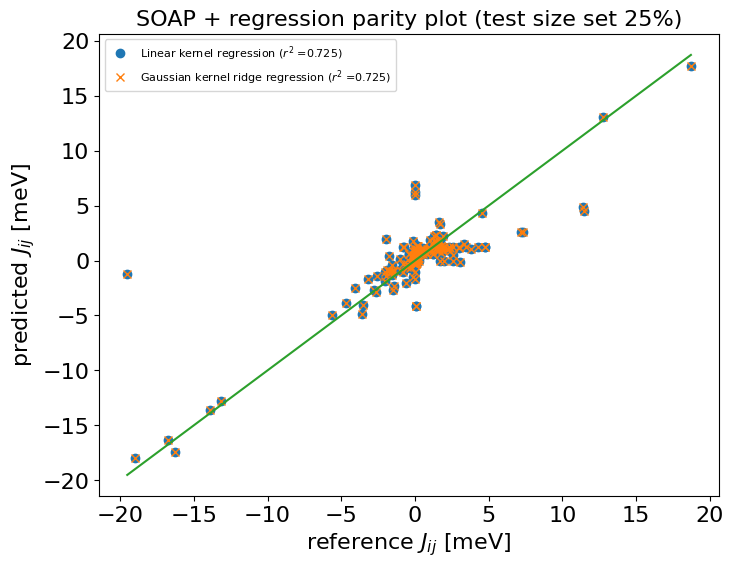

In [842]:
# do the regression parity plot
plt.plot(y_test, y_pred1, 'o', label="Linear kernel regression ($r^{2}$ =%.3f)" % r2_score(y_test, y_pred1))
plt.plot(y_test, y_pred2, 'x', label="Gaussian kernel ridge regression ($r^{2}$ =%.3f)" % r2_score(y_test, y_pred2))
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
plt.title("SOAP + regression parity plot (test size set 25%)")
plt.xlabel('reference $J_{ij}$ [meV]')
plt.ylabel('predicted $J_{ij}$ [meV]')
plt.legend(loc="upper left", prop={'size': 8})
plt.gcf().set_size_inches(8, 6)
#plt.show()

plt.savefig('fig/SOAP_parity_plot.pdf')

#### Visualize Jij Heatmap

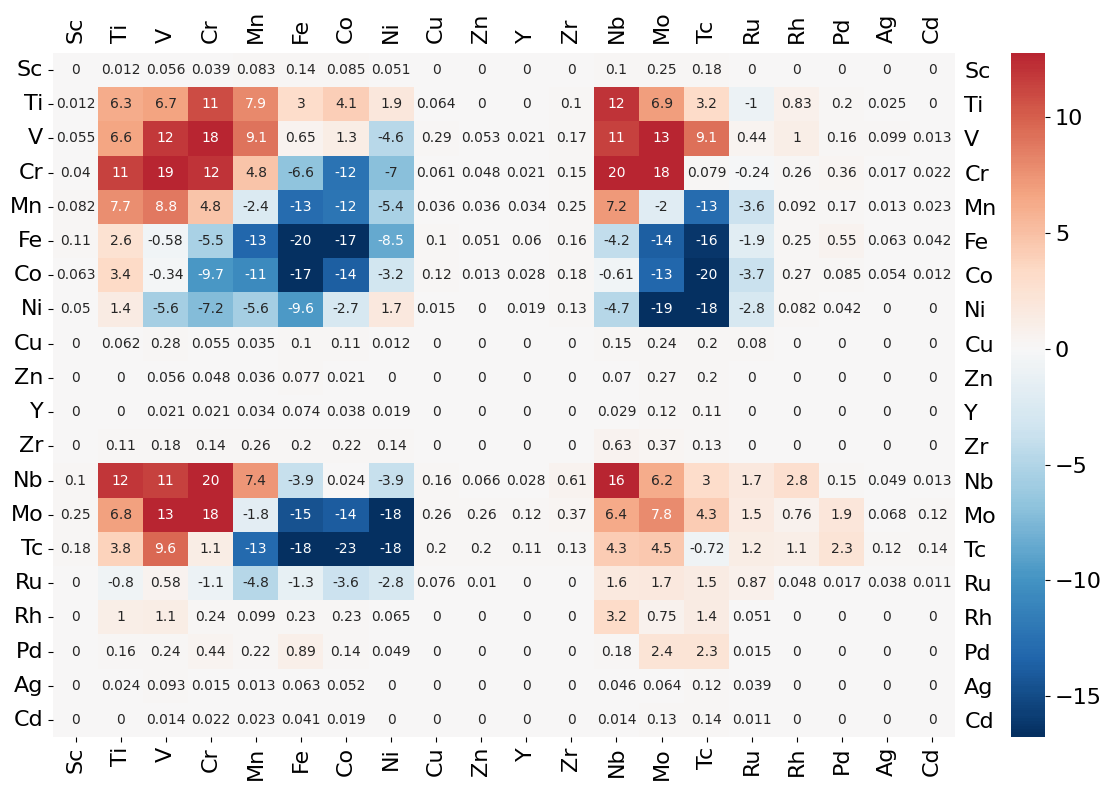

In [802]:
# set soap as features
#x = soap2

# set J as target labels
#y = table.iloc[:,8]

y_pred = grid_search.predict(x) # make prediction on FULL feature matrix!
y_abs_err = np.abs(y - y_pred)
heatmap_matrix_parity, missing_defect_pairs = \
  sisclab22p6.target_plotters.create_heatmap_matrix(table, value_array=y, ilayer1= 3,
                          offset1=1, aggregate_function='mean')

# plot heatmap and save
sisclab22p6.target_plotters.plot_heatmap(heatmap_matrix_parity, publication_target='slides', fontsize='small')
plt.savefig('fig/parity-heatmap-Jij.pdf')

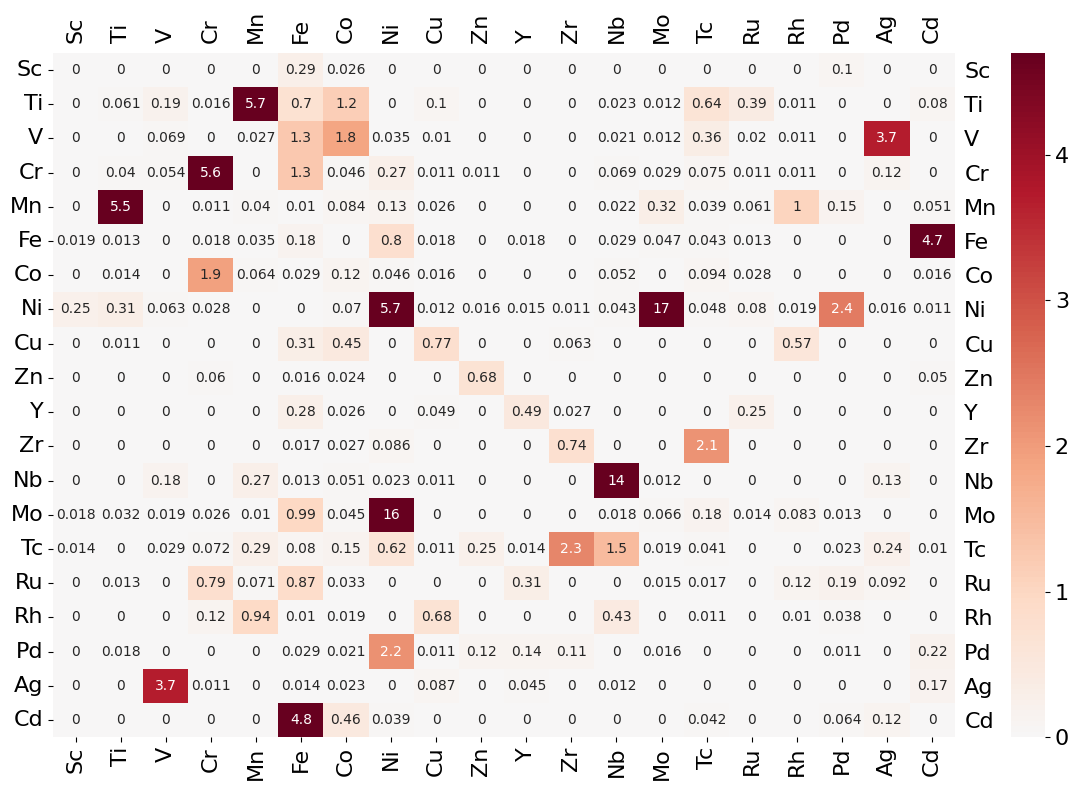

In [464]:
# set soap as features
#x = soap2

# set J as target labels
#y = table.iloc[:,8]

y_pred = grid_search.predict(x) # make prediction on FULL feature matrix!
y_abs_err = np.abs(y - y_pred)
heatmap_matrix_parity, missing_defect_pairs = \
  sisclab22p6.target_plotters.create_heatmap_matrix(table, value_array=y_abs_err, ilayer1= 3,
                          offset1=1, aggregate_function='mean')

# plot heatmap and save
sisclab22p6.target_plotters.plot_heatmap(heatmap_matrix_parity, publication_target='slides', fontsize='small')
plt.savefig('fig/parity-heatmap-Jij_2.pdf')